# Data Science Internship Program organised by Oasis Infobyte(OIBSIP-2023)

### Author: Himanshu Shekatkar

## Task-3 Car Price Prediction with Machine Learning

### Batch: April Phase 1 OIBSIP

### Importing Packages and Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model

### Importing Dataset

In [2]:
df=pd.read_csv('carprice.csv')

### Preprocessing

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Checking for null values

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(205, 26)

### EDA

In [10]:
import seaborn as sns

<Axes: >

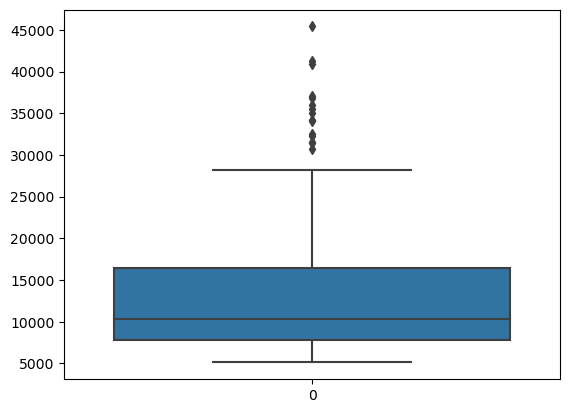

In [11]:
sns.boxplot(df['price'])

In [12]:
sorted(df['price'],reverse=True)

[45400.0,
 41315.0,
 40960.0,
 37028.0,
 36880.0,
 36000.0,
 35550.0,
 35056.0,
 34184.0,
 34028.0,
 32528.0,
 32250.0,
 31600.0,
 31400.5,
 30760.0,
 28248.0,
 28176.0,
 25552.0,
 24565.0,
 23875.0,
 22625.0,
 22470.0,
 22018.0,
 21485.0,
 21105.0,
 20970.0,
 19699.0,
 19045.0,
 18950.0,
 18920.0,
 18620.0,
 18420.0,
 18399.0,
 18344.0,
 18280.0,
 18150.0,
 18150.0,
 17950.0,
 17859.167,
 17710.0,
 17669.0,
 17450.0,
 17199.0,
 17075.0,
 16925.0,
 16900.0,
 16845.0,
 16695.0,
 16630.0,
 16558.0,
 16515.0,
 16503.0,
 16500.0,
 16500.0,
 16430.0,
 15998.0,
 15985.0,
 15750.0,
 15690.0,
 15645.0,
 15580.0,
 15510.0,
 15250.0,
 15040.0,
 14869.0,
 14489.0,
 14399.0,
 13950.0,
 13860.0,
 13845.0,
 13645.0,
 13499.0,
 13499.0,
 13495.0,
 13415.0,
 13295.0,
 13200.0,
 12964.0,
 12945.0,
 12940.0,
 12764.0,
 12629.0,
 12440.0,
 12290.0,
 12170.0,
 11900.0,
 11850.0,
 11845.0,
 11694.0,
 11595.0,
 11549.0,
 11259.0,
 11248.0,
 11245.0,
 11199.0,
 11048.0,
 10945.0,
 10898.0,
 10795.0,
 10698.0

In [13]:
df=df[~(df['price']>=41315.0) & (df['price']<=45400.0)]

In [14]:
df.shape

(203, 26)

In [15]:
print(df.price.describe(percentiles=[0.225,0.5,0.75,0.85,0.98,1]))

count      203.000000
mean     12980.348113
std       7440.775514
min       5118.000000
22.5%     7609.000000
50%      10245.000000
75%      16500.000000
85%      18382.500000
98%      35530.240000
100%     40960.000000
max      40960.000000
Name: price, dtype: float64


In [16]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [17]:
df=df[['symboling','wheelbase','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]

In [18]:
df

,symboling,wheelbase,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [19]:
predict='price'

In [20]:
x=np.array(df.drop([predict],1))
y=np.array(df[predict])

C:\Users\hpcnd\AppData\Local\Temp\ipykernel_13392\4286778693.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=np.array(df.drop([predict],1))


In [21]:
print(x)
print(y)

[[ 3.000e+00  8.860e+01  6.410e+01 ...  5.000e+03  2.100e+01  2.700e+01]
 [ 3.000e+00  8.860e+01  6.410e+01 ...  5.000e+03  2.100e+01  2.700e+01]
 [ 1.000e+00  9.450e+01  6.550e+01 ...  5.000e+03  1.900e+01  2.600e+01]
 ...
 [-1.000e+00  1.091e+02  6.890e+01 ...  5.500e+03  1.800e+01  2.300e+01]
 [-1.000e+00  1.091e+02  6.890e+01 ...  4.800e+03  2.600e+01  2.700e+01]
 [-1.000e+00  1.091e+02  6.890e+01 ...  5.400e+03  1.900e+01  2.500e+01]]
[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    36880.     5151.     6295.     6575.     5572.
  6377.     7957.     6229.     6692.     7609.     8558.     8921.
 12964.     6479.     6855.     5399.     6529.     7129.     7295.
  7295.     7895.     9095.     8845.    10295.    12945.    10345.
  6785.     8916.5    8916.5   11048.    32250.    35550.    36000.
  5195.     6095.     6795.     6695.     7395.    10945.    11845.
 13645.    1

### Spliting Dataset into Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

### Importing the models

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
print('training data shape is:{}.'.format(x_train.shape))
print('training label shape is:{}.'.format(y_train.shape))
print('testing data shape is:{}.'.format(x_test.shape))
print('testing label shape is:{}.'.format(y_test.shape))


training data shape is:(162, 13).
training label shape is:(162,).
testing data shape is:(41, 13).
testing label shape is:(41,).


### Model Training Random Forest Model

In [26]:
rf=RandomForestRegressor()

In [27]:
rf.fit(x,y)

RandomForestRegressor()

In [28]:
rf.score(x_train,y_train)

0.9885406032037943

In [29]:
rf.score(x_test,y_test)

0.9844355393793244

In [30]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [31]:
xgb=GradientBoostingRegressor()
xgb.fit(x_train,y_train)

GradientBoostingRegressor()

### Prediction on Test Data

In [32]:
y_pred1=lr.predict(x_test)
y_pred2=rf.predict(x_test)
y_pred3=xgb.predict(x_test)

In [33]:
print(y_pred1,y_pred2,y_pred3)

[11938.83247238 21587.33511058  5209.43893496  8038.96374167
 10241.57455728  9440.51007814 14543.21190794 11206.96035746
  9208.68358397 14494.62372966 22358.96648396 16519.73043234
  9366.31093521 30571.36825055 25385.63214774 13300.24471091
 13714.08959345  6834.09386418 17304.04657302 22383.31481964
  7605.33362163  8289.1277301   6838.03484656  9159.17402608
 15961.46400382 12232.41967665 18467.75565749  7176.29269802
 25895.32261671  6722.9345782  17981.30707101 21748.96321364
 18772.10325685  6264.5067907  10586.61605671 11175.66899012
 10520.65798963 15787.7705556  16637.76914544 12249.26669509
 13707.34421682] [10775.72666667 14553.09        5621.35916667  7072.85
  8469.49       10954.18       16070.15       10073.18
  7828.06       14961.28       16521.52167    14131.23
 10361.37       33826.44       35037.995      16715.355
  9107.41        8164.96       17964.07       18117.23167
  7568.47        7904.53        7913.89        7873.34
 14541.01       15749.93       17084.17

In [34]:
from sklearn import metrics

In [35]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)

In [36]:
print(score1,score2,score3)

0.7384819849538242 0.9844355393793244 0.8936805550039337


In [37]:
rf.score(x_train,y_train)

0.9885406032037943

#### 0.9885406032037943

In [38]:
print(len(x_test))

41


#### Test set: 41

In [39]:
rf.score(x_test,y_test)

0.9844355393793244

#### Gives the Accuracy as 98.44355393793244% 